In [37]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
city_df = pd.read_csv("city_data.csv")
ride_df = pd.read_csv("ride_data.csv")
combined_df = pd.merge(city_df, ride_df, how='outer', on='city')
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


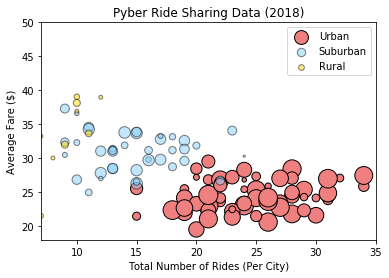

In [39]:
#filtering by region
urban_data = combined_df[combined_df["type"] == "Urban"]
suburban_data = combined_df[combined_df["type"] == "Suburban"]
rural_data = combined_df[combined_df["type"] == "Rural"]

#plotting urban
urban_avg_fares = urban_data.groupby("city")["fare"].mean()
urban_total_rides = urban_data.groupby("city")["ride_id"].count()
urban_total_drivers= urban_data.groupby("city")["driver_count"].sum()/urban_total_rides
plt.scatter(urban_total_rides, 
            urban_avg_fares, 
            s = 5*urban_total_drivers, 
            marker = "o" , 
            facecolors = "lightcoral", 
            edgecolors = "black", 
            alpha=1)

#plotting suburban
suburban_avg_fares = suburban_data.groupby("city")["fare"].mean()
suburban_total_rides = suburban_data.groupby("city")["ride_id"].count()
suburban_total_drivers= suburban_data.groupby("city")["driver_count"].sum()/suburban_total_rides
plt.scatter(suburban_total_rides, 
            suburban_avg_fares, 
            s = 5*suburban_total_drivers, 
            marker = "o" , 
            facecolors = "lightskyblue", 
            edgecolors = "black", 
            alpha=0.5
           )

#plotting rural
rural_avg_fares = rural_data.groupby("city")["fare"].mean()
rural_total_rides = rural_data.groupby("city")["ride_id"].count()
rural_total_drivers= rural_data.groupby("city")["driver_count"].sum()/rural_total_rides
plt.scatter(rural_total_rides, 
            rural_avg_fares, 
            s = 5*rural_total_drivers, 
            marker = "o" , 
            facecolors = "gold", 
            edgecolors = "black",
            alpha = 0.5)

#chart formatting
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")
plt.legend(['Urban', 'Suburban', 'Rural'])
plt.xlim(7, 35)
plt.ylim(18, 50)
plt.show()


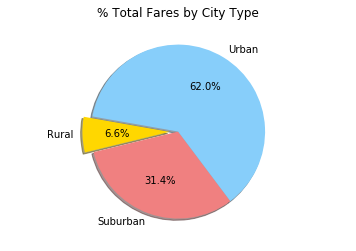

In [40]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# Make groups and sum
fare_groups = combined_df.groupby(['type'])
sum_fares = fare_groups['fare'].sum()

# Values per Label
sizes = [sum_fares[hannah] for hannah in sum_fares.keys()]

# Formatting
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0)
plt.axis("equal")

# Labels
plt.title("% Total Fares by City Type")

# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=170)

# Prints our pie chart to the screen
plt.show()

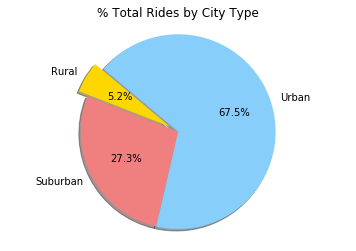

In [41]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# Make groups and sum
ride_groups = combined_df.groupby(['type'])
sum_rides = ride_groups['ride_id'].count()

# Values per Label
sizes = [sum_rides[hannah] for hannah in sum_rides.keys()]
         
# Formatting
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0)
plt.title("% Total Rides by City Type")

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

In [42]:
#labels for pie chart
labels = ["Urban", "Suburban", "Rural"]

#filtering by region
urban_data = city_df[city_df["type"] == "Urban"]
suburban_data = city_df[city_df["type"] == "Suburban"]
rural_data = city_df[city_df["type"] == "Rural"]


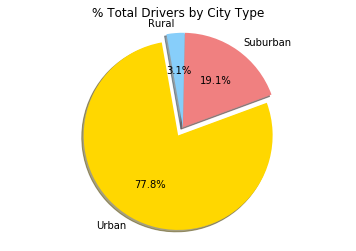

In [44]:
#getting urban drivers
urban_total_drivers= urban_data.groupby("type")["driver_count"].sum()

#getting suburban drivers
suburban_total_drivers= suburban_data.groupby("type")["driver_count"].sum()

#getting rural drivers
rural_total_drivers= rural_data.groupby("type")["driver_count"].sum()

# Values per Label
sizes = [urban_total_drivers, suburban_total_drivers, rural_total_drivers]

# Formatting
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0)
plt.title("% Total Drivers by City Type")

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis("equal")
plt.show()